In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Taking results of [VM-621](https://linear.app/fluence/issue/VM-621/measure-latency-on-test-intel-machine), approximate
RandomX cache init time and hash calculation time as second degree polynomials of `k` - number of parallel RandomX invoked. Approximate 

In [43]:
times = [
    {
        "batch_size": 64,
        "cus": 1,
        "cache_init": 419,
        "hash_calc": 39
    },
    {
        "batch_size": 64,
        "cus": 2,
        "cache_init": 436,
        "hash_calc": 37
    },
    {
        "batch_size": 64,
        "cus": 4,
        "cache_init": 464,
        "hash_calc": 38
    },
    {
        "batch_size": 64,
        "cus": 8,
        "cache_init": 655,
        "hash_calc": 44
    },
    {
        "batch_size": 64,
        "cus": 16,
        "cache_init": 657,
        "hash_calc": 44
    },
    {
        "batch_size": 64,
        "cus": 32,
        "cache_init": 661,
        "hash_calc": 45
    },
    {
        "batch_size": 96,
        "cus": 1,
        "cache_init": 424,
        "hash_calc": 38
    },
    {
        "batch_size": 96,
        "cus": 2,
        "cache_init": 451,
        "hash_calc": 38
    },
    {
        "batch_size": 96,
        "cus": 4,
        "cache_init": 478,
        "hash_calc": 38
    },
    {
        "batch_size": 96,
        "cus": 8,
        "cache_init": 680,
        "hash_calc": 44
    },
]
cus = [t["cus"] for t in times if t["cus"] <= 8]
cache_init = [t["cache_init"] for t in times if t["cus"] <= 8]
hash_calc = [t["hash_calc"] for t in times if t["cus"] <= 8]

In [44]:
cache_init_time_p = np.polynomial.Polynomial.fit(cus, cache_init, deg=2, domain=[1, 8])
hash_calc_time_p = np.polynomial.Polynomial.fit(cus, hash_calc, deg=2, domain=[1, 8])

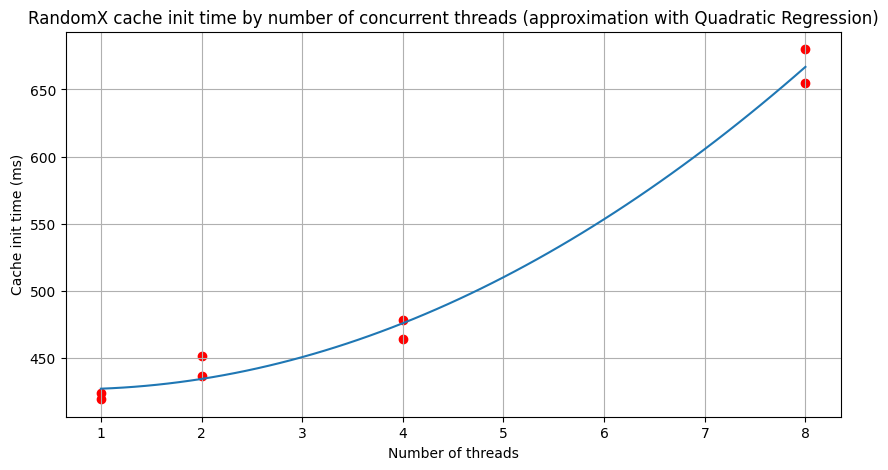

In [45]:
x, y = cache_init_time_p.linspace(64)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.scatter(cus, cache_init, color="red")
plt.xlabel("Number of threads")
plt.ylabel("Cache init time (ms)")
plt.title("RandomX cache init time by number of concurrent threads (approximation with Quadratic Regression)")
plt.grid(True)

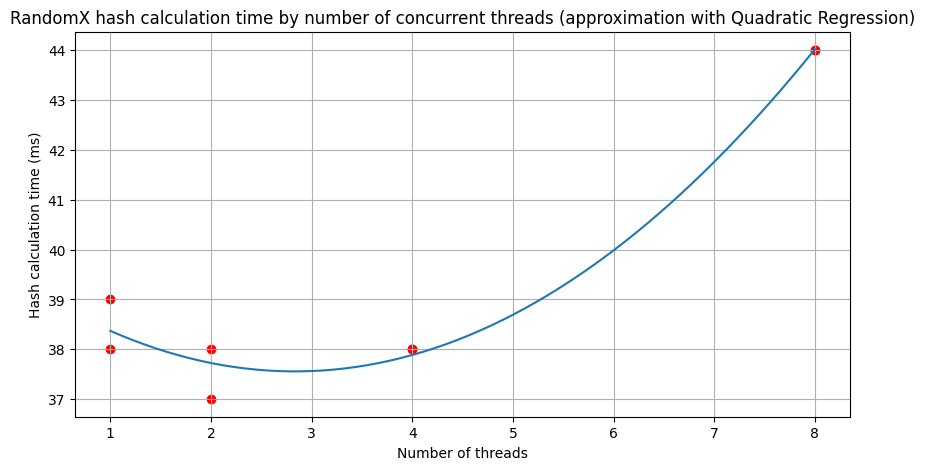

In [46]:
x, y = hash_calc_time_p.linspace(64)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.scatter(cus, hash_calc, color="red")
plt.xlabel("Number of threads")
plt.ylabel("Hash calculation time (ms)")
plt.title("RandomX hash calculation time by number of concurrent threads (approximation with Quadratic Regression)")
plt.grid(True)

Define transaction time (in ms) for batch size `n` with `k` compute units in batch
as $t(n, k) = init\_time(k) + \left\lceil \dfrac{n}{k} \right\rceil \cdot hash\_time(k)$. Then theoretical limit of PPS (proofs per second) is $\dfrac{n}{t(n, k)} \cdot 1000$.

In [47]:
def PPS(n, k):
    t = cache_init_time_p(k) + np.ceil(n / k) * hash_calc_time_p(k)
    return 1000 * n / t

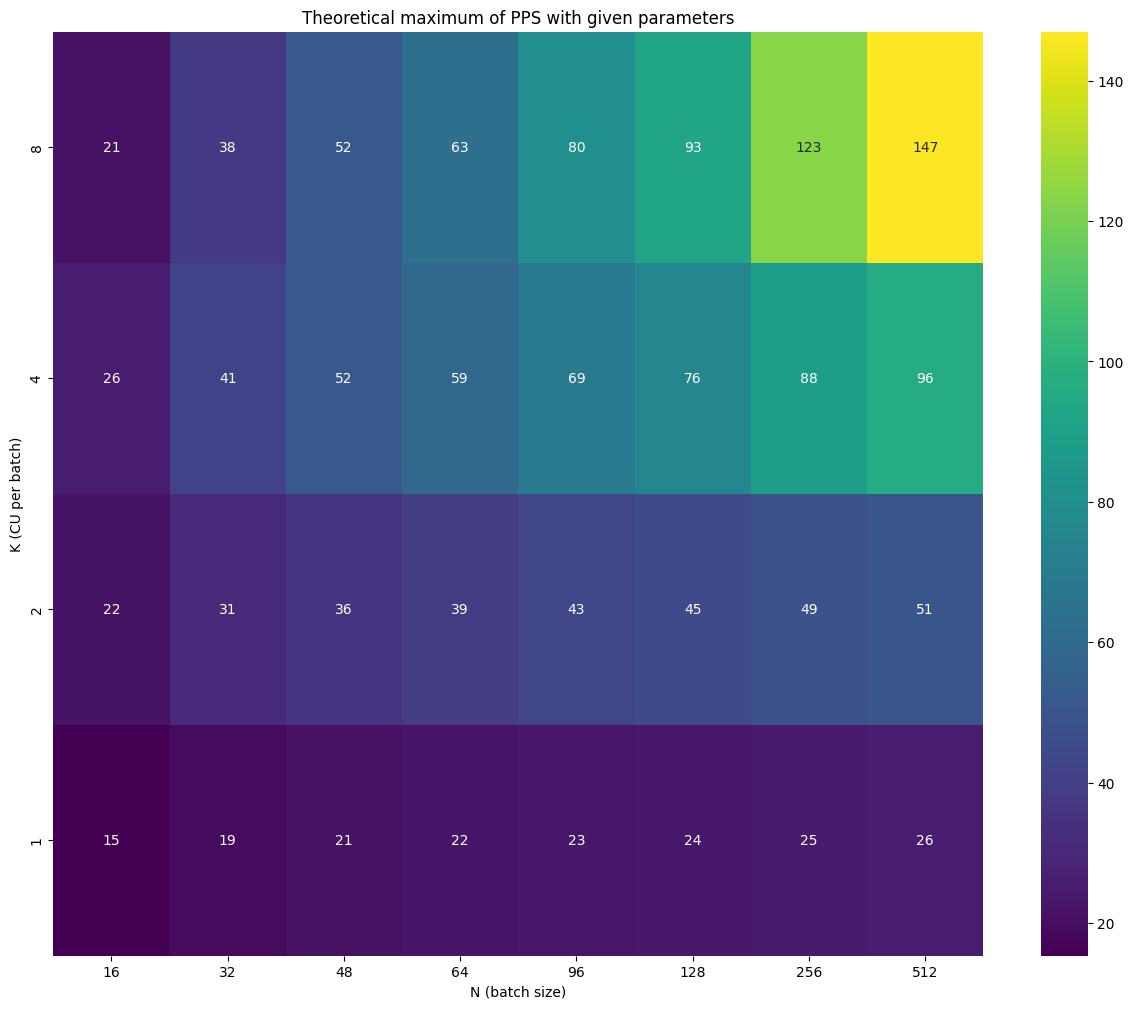

In [48]:
n = np.array([16, 32, 48, 64, 96, 128, 256, 512])
k = np.array([1, 2, 4, 8])
N, K = np.meshgrid(n, k)

P = PPS(N, K)
mask = N < K

plt.figure(figsize=(15, 12))
sns.heatmap(P[::-1], mask=mask[::-1], cmap='viridis', xticklabels=n, yticklabels=k[::-1], annot=True, fmt='.0f')
plt.xlabel('N (batch size)')
plt.ylabel('K (CU per batch)')
plt.title('Theoretical maximum of PPS with given parameters')
plt.show()

In [49]:
cache_init = pd.Series()
hash_calc = pd.Series()

In [ ]:
cache_init.describe()

In [ ]:
hash_calc.describe()